<a href="https://colab.research.google.com/github/asudupa/Project1/blob/master/EVA_Assignment_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

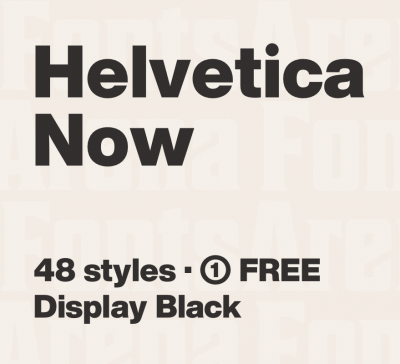

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

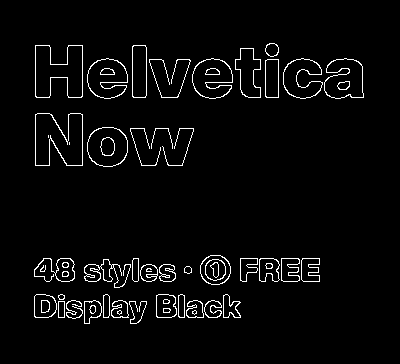

In [5]:
cv2_imshow(edges)

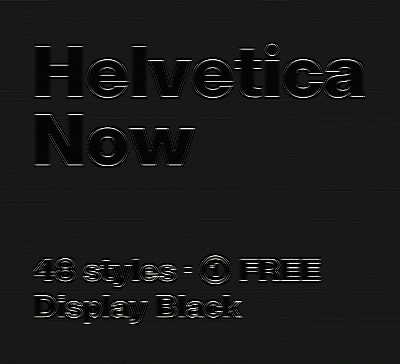

In [6]:
#Horizontal edge detector
#Kernel captures horizontal lines, and ignores cross and vertical lines
#While 1,0,1 in top row filters top lines, 1,0,1 in bottom row captures bottom lines

#kernel = np.float32([[1,0,1],[-1,0,-1],[0,0,0]]) - Top lines
#kernel = np.float32([[0,0,0],[-1,0,-1],[1,0,1]]) - Bottom lines


kernel = np.float32([[1.05,0,1.05],[-2,0,-2],[1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

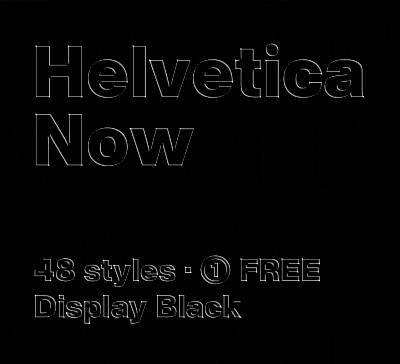

In [102]:
#Original negative
kernel = np.float32([[0,0,1],[0,-2,0],[1,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

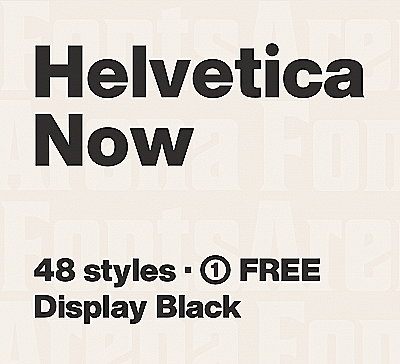

In [8]:
#Sharpen
#Kernel sharpens the input image, center point of the kernel has high value and amplifies the image
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

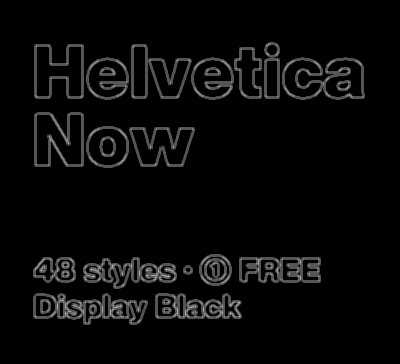

In [9]:
#Blurr -1
#Another version of blurr, retaining the edges, filtering out background color
#This kernel is simple normalisation/average

kernel = np.ones((3,3),np.float32)/9

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)


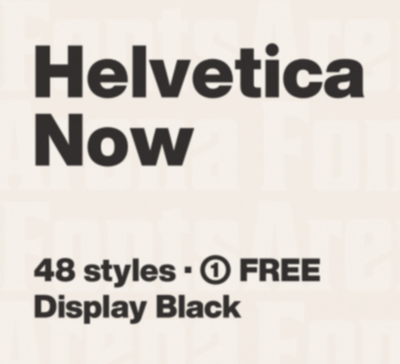

In [10]:
#Blurr -2
#Another version of Kernel which blurrs the input image, standard values for blurr

kernel = np.float32([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

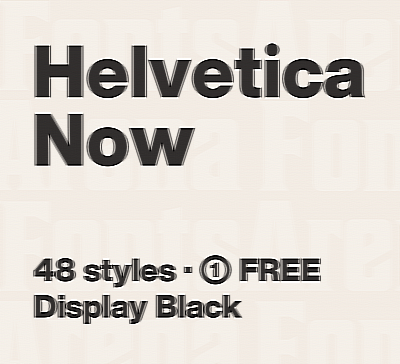

In [11]:
#Blurr -3
# One version of kernel to make input image blurr, values arrived by manual iteration
kernel = np.float32([[0,-1,0],[1,1,1],[0,-1,0]])
#kernel = np.float32([[1,-2,1],[1,-2,1],[1,-2,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

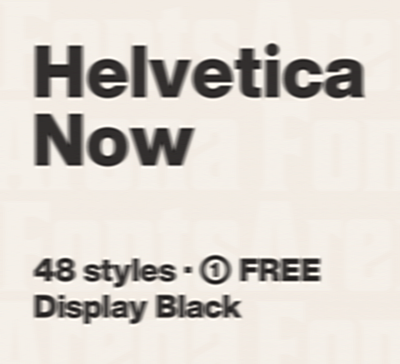

In [12]:
#Blurr -4
#Gaussian blurr
#Standard kernel values for Gaussian blur

blur = cv2.GaussianBlur(image,(5,5),0)

dst = cv2.filter2D(blur,-1,kernel)
cv2_imshow(dst)


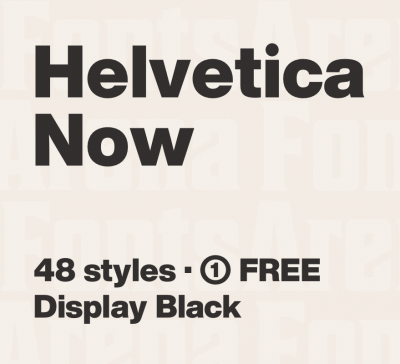

In [13]:
#Identity
#This kernel retains the input image as-is, without changing the image.
#This kernel passes the input image as-is to next layer

kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

In [0]:
import math
#45 deg edges
# Typically it is calculated Sqrt(x^2 + y^2)

kernelx = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])
kernely = np.float32([[-1,0,1],[-2,0,2],[-1,0,1]])

kernel = math.sqrt(kernelx**2 + kernely**2)
#print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

TypeError: ignored

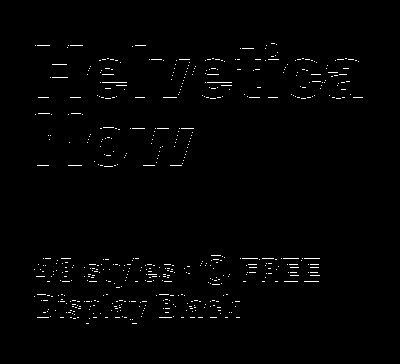

In [94]:
#45 degree edge
##(1/16, 2/16, 1/16), (2/16, 4/16, 2/16), (1/16, 2/16, 1/16)
#kernel = np.float32([[1,2,1],[2,4,2],[1,2,1]])/16

kernel = np.float32([[-1,-1,0],[0,1,0],[-1.75,0,0]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)


In [0]:
#(1/16, 2/16, 1/16), (2/16, 4/16, 2/16), (1/16, 2/16, 1/16)

In [0]:
#kernel = np.float32([[0,0,-1],[1,0,1],[0,0,-1]])
#kernel = np.float32([[1,1,1],[1,1,1],[1,1,1]])/9

#kernel = np.float32([[0,-25,1],[-25,5,-25],[1,-25,0]])
#kernel = np.float32([[0,-1,0],[1,0,1],[0,-1,0]])
kernel = np.float32([[-2,-1,0],[-1,0,1],[0,1,2]])

#45 deg
#kernel = np.float32([[0,1,1],[-1,0,1],[-1,-1,0]])
#kernel = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])

#kernel2 = np.float32([[0,1,2],[-1,0,1],[-2,-1,0]])
#kernel2 = np.float32([[-2,-1,0],[-1,0,1],[0,1,2]])

kernel2 = np.float32([[1,0,-1],[2,0,-2],[1,0,-1]])
